# Exo-Planet Data Classification

In [2]:
#Import the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture as GMM

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

import warnings
warnings.filterwarnings("ignore")

## Exo-planet Data Analysis

In this project, I am using Exo-planet data from NASA and using machine learning predictive models to classify planets based on the radius and mass of the planet. My goal is to classify the planets by their overall size. The models I used are: KMeans Clustering, GMM, and a Neural Network with one hidden layer (10 nodes).

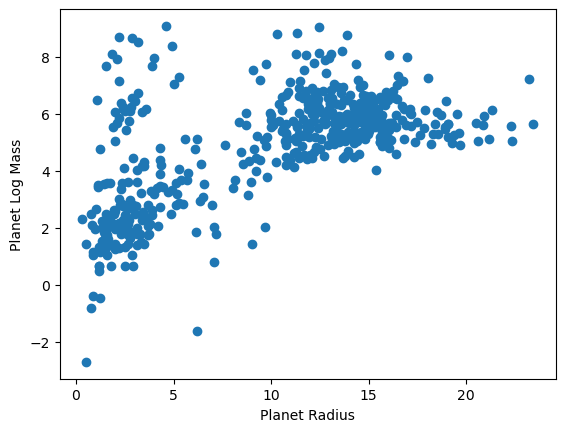

In [7]:
# Here I extract the features I deem important for classification. I also normalized the mass using log to make 
# the data easier to interpret.
dplan = pd.read_csv('exoplanets.csv')
reduced_df = dplan[['name','radius','mass']].copy()
reduced_df['mass log'] = np.log(dplan['mass'])
plt.scatter(reduced_df.loc[:,'radius'], reduced_df.loc[:,'mass log'])
plt.xlabel('Planet Radius')
plt.ylabel('Planet Log Mass');

In [8]:
display(reduced_df)

,name,radius,mass,mass log
0,2MASS J21402931+1625183 A b,10.312188,6657.910000,8.803561
1,55 Cnc e,1.905513,8.078476,2.089203
2,BD+20 594 b,2.230571,16.299962,2.791163
3,CoRoT-1 b,16.701261,327.334000,5.790981
4,CoRoT-10 b,10.872633,873.950000,6.773023
...,...,...,...,...
512,XO-2 N b,11.421869,189.726600,5.245584
513,XO-3 b,13.641231,3746.862000,8.228674
514,XO-4 b,14.907837,565.684000,6.338036
515,XO-5 b,12.778146,378.182000,5.935376


## Classification using GMM Clustering

**I am using Gaussian Mixed Model (GMM) because it is able to make classifications of the data without the restriction of only being a spherical cluster.**

In [9]:
gmm = GMM(3)
clusters = gmm.fit_predict(reduced_df[['radius','mass', 'mass log']])
reduced_df['GMM label'] = clusters
reduced_df

,name,radius,mass,mass log,GMM label
0,2MASS J21402931+1625183 A b,10.312188,6657.910000,8.803561,2
1,55 Cnc e,1.905513,8.078476,2.089203,0
2,BD+20 594 b,2.230571,16.299962,2.791163,0
3,CoRoT-1 b,16.701261,327.334000,5.790981,1
4,CoRoT-10 b,10.872633,873.950000,6.773023,1
...,...,...,...,...,...
512,XO-2 N b,11.421869,189.726600,5.245584,0
513,XO-3 b,13.641231,3746.862000,8.228674,1
514,XO-4 b,14.907837,565.684000,6.338036,1
515,XO-5 b,12.778146,378.182000,5.935376,1


Silhouette Score:  0.16689828390802253


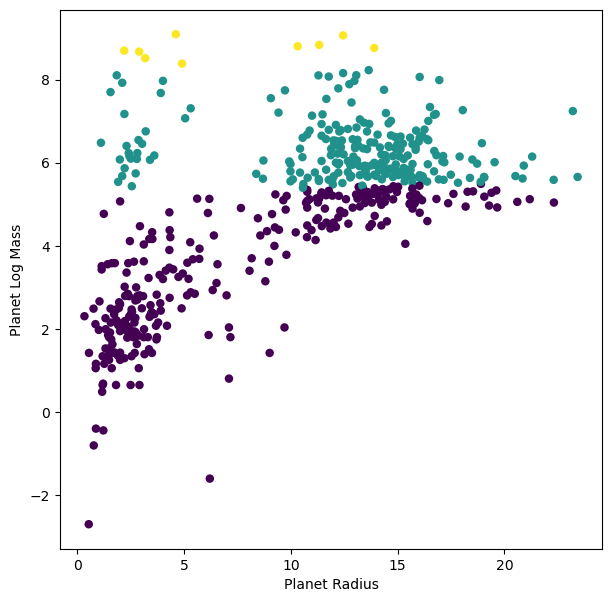

In [11]:
## Using GMM
fig, ax = plt.subplots(figsize=(7,7))
x = reduced_df['radius']
y = reduced_df['mass log']
ax.scatter(x, y, c=reduced_df['GMM label'], s=150, marker='.', edgecolor='none')
print("Silhouette Score: ",silhouette_score(reduced_df[['radius', 'mass log']], reduced_df['GMM label']))
plt.xlabel('Planet Radius')
plt.ylabel('Planet Log Mass');

_This model did not do so well in terms of silouhette score. We can imply that the predictions made by this model are not reliable._

## Classification using KMeans Clustering

**KMeans clustering is a standard clustering method in the industry. It uses the average data point of a cluster to determine the location of the cluster and the classification of surrounding data points.**

In [12]:
# Finding the best K in regards to silhouette score
scores = {}

for n in np.arange(2,9):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(reduced_df[['radius', 'mass log']])
    labels = kmeans.labels_
    scores[n] = silhouette_score(reduced_df[['radius', 'mass log']], labels, random_state=42)

print('best number of clusters: ',max(scores, key=scores.get))

best number of clusters:  2


In [13]:
kmeans = KMeans(n_clusters = 2, random_state = 42, n_init=10)
labels = kmeans.fit_predict(reduced_df[['radius', 'mass log']])
reduced_df['KCluster = 2 label'] = labels
reduced_df

,name,radius,mass,mass log,GMM label,KCluster = 2 label
0,2MASS J21402931+1625183 A b,10.312188,6657.910000,8.803561,2,0
1,55 Cnc e,1.905513,8.078476,2.089203,0,1
2,BD+20 594 b,2.230571,16.299962,2.791163,0,1
3,CoRoT-1 b,16.701261,327.334000,5.790981,1,0
4,CoRoT-10 b,10.872633,873.950000,6.773023,1,0
...,...,...,...,...,...,...
512,XO-2 N b,11.421869,189.726600,5.245584,0,0
513,XO-3 b,13.641231,3746.862000,8.228674,1,0
514,XO-4 b,14.907837,565.684000,6.338036,1,0
515,XO-5 b,12.778146,378.182000,5.935376,1,0


0.6868243311764541

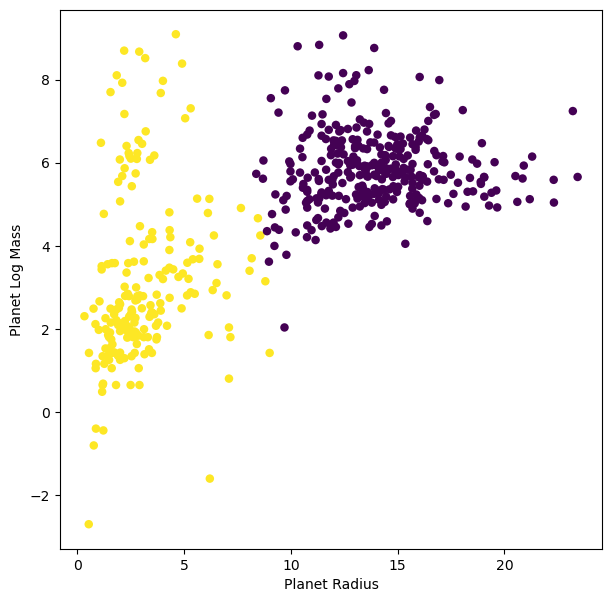

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
x = reduced_df['radius']
y = reduced_df['mass log']
ax.scatter(x, y, c=reduced_df['KCluster = 2 label'], s=150, marker='.', edgecolor='none')
display(silhouette_score(reduced_df[['radius', 'mass log']], reduced_df['KCluster = 2 label']))
plt.xlabel('Planet Radius')
plt.ylabel('Planet Log Mass');

## Classification using Neural Network (Using GMM labels)

In [20]:
X = reduced_df[['radius', 'mass log']]
y = reduced_df[['GMM label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(10), verbose=False, activation='logistic', solver='lbfgs', random_state=42, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=300,
              random_state=42, solver='lbfgs')

In [31]:
preds = clf.predict(X_test)
reduced_df['GMM NN labels'] = clf.predict(X)

print("Accuracy of NN using GMM Labels:", accuracy_score(y_test, preds))
display(reduced_df)

Accuracy of NN using GMM Labels: 0.9883040935672515


,name,radius,mass,mass log,GMM label,KCluster = 2 label,GMM NN labels,KCluster NN labels
0,2MASS J21402931+1625183 A b,10.312188,6657.910000,8.803561,2,0,0,0
1,55 Cnc e,1.905513,8.078476,2.089203,0,1,1,1
2,BD+20 594 b,2.230571,16.299962,2.791163,0,1,1,1
3,CoRoT-1 b,16.701261,327.334000,5.790981,1,0,0,0
4,CoRoT-10 b,10.872633,873.950000,6.773023,1,0,0,0
...,...,...,...,...,...,...,...,...
512,XO-2 N b,11.421869,189.726600,5.245584,0,0,0,0
513,XO-3 b,13.641231,3746.862000,8.228674,1,0,0,0
514,XO-4 b,14.907837,565.684000,6.338036,1,0,0,0
515,XO-5 b,12.778146,378.182000,5.935376,1,0,0,0


## Classification using Neural Network (Using K Cluster labels)

In [22]:
X = reduced_df[['radius', 'mass log']]
y = reduced_df[['KCluster = 2 label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(10), verbose=False, activation='logistic', solver='lbfgs', random_state=42, max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=300,
              random_state=42, solver='lbfgs')

In [24]:
preds = clf.predict(X_test)
reduced_df['KCluster NN labels'] = clf.predict(X)

print("Accuracy of NN using KCluster Labels:", accuracy_score(y_test, preds))
display(reduced_df)

Accuracy of NN using KCluster Labels: 0.9883040935672515


,name,radius,mass,mass log,GMM label,KCluster = 2 label,GMM NN labels,KCluster NN labels
0,2MASS J21402931+1625183 A b,10.312188,6657.910000,8.803561,2,0,2,0
1,55 Cnc e,1.905513,8.078476,2.089203,0,1,0,1
2,BD+20 594 b,2.230571,16.299962,2.791163,0,1,0,1
3,CoRoT-1 b,16.701261,327.334000,5.790981,1,0,1,0
4,CoRoT-10 b,10.872633,873.950000,6.773023,1,0,1,0
...,...,...,...,...,...,...,...,...
512,XO-2 N b,11.421869,189.726600,5.245584,0,0,0,0
513,XO-3 b,13.641231,3746.862000,8.228674,1,0,1,0
514,XO-4 b,14.907837,565.684000,6.338036,1,0,1,0
515,XO-5 b,12.778146,378.182000,5.935376,1,0,1,0


## Conclusion

The KMeans clustering had a better fit to the data than the GMM clustering according to their silhouette score (0.6868243311764541 and 0.16689828390802253 respectively) where a larger score is better. After using each label to for a Neural Network, the Neural Network was able to made predictions with equal accuracies for both labeling methods.

Although the Neural Network had the same accuracy for both labelling methods, it is still a better idea to use the KMeans clustering method to label data as it had the better silhouette score.